<a href="https://colab.research.google.com/github/TamimEhsan/internship-nwpgcl/blob/master/Task%201/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set up code checking
import os
if not os.path.exists("Input/input.csv"):
  print("error")
print(os.listdir())
print("Setup Complete")

['.config', '.ipynb_checkpoints', 'Input', 'sample_data']
Setup Complete


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('Input/input.csv')
# print(data.head())
y = data.fault
X = data.copy()
X = X.drop(X.columns[-1], axis=1)
X_main = X.copy()
y_main = y.copy()
print(data.shape)
print(X.shape)
print(y.shape)


(87, 37)
(87, 36)
(87,)


0.5428571428571428


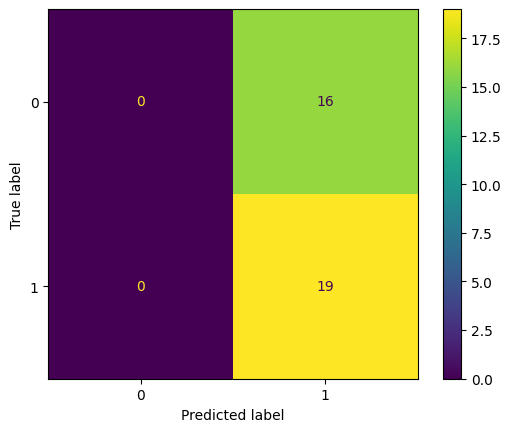

In [ ]:
# Support Vector Machine
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
    X_main, y_main, test_size=0.4,random_state=42
)
from sklearn import svm

model = svm.SVC(kernel="rbf")

model.fit(X_training, y_training)

predictions = model.predict(X_testing)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_testing, predictions)

print(acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_testing, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# K fold classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=3, shuffle=True, random_state=42)
val_score = cross_val_score(model, X=X, y=y, cv=cv)

print(val_score)

[0.51724138 0.62068966 0.65517241]


In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=3)
print(scores)

[0.62068966 0.65517241 0.62068966]


0.5714285714285714


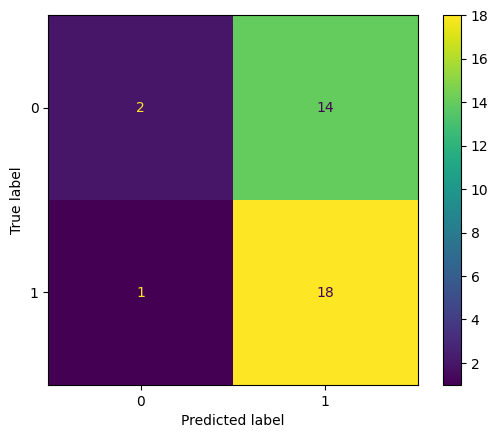

In [ ]:
# logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
    X_main, y_main, test_size=0.4,random_state=42
)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_training, y_training)

predictions = model.predict(X_testing)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_testing, predictions)

print(acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_testing, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()


0.5185185185185185


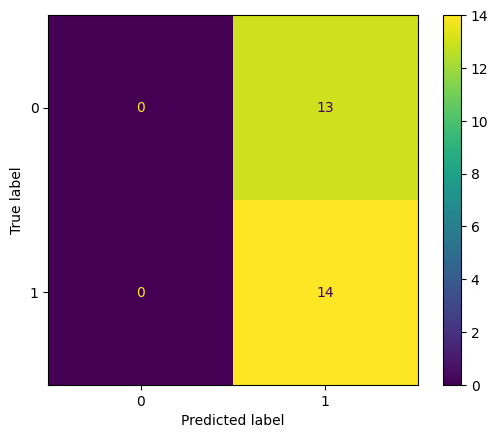

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
    X_main, y_main, test_size=0.3,random_state=42
)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_training, y_training)

predictions = model.predict(X_testing)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_testing, predictions)

print(acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_testing, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()

0.8


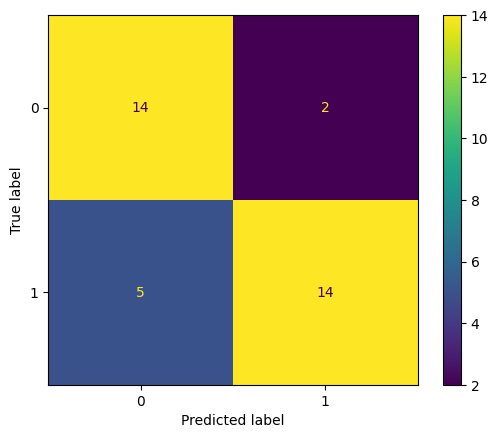

In [ ]:
# XGBOOST 
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
    X_main, y_main, test_size=0.4,random_state=42
)
XGB_model = XGBClassifier()
XGB_model.fit(X_training, y_training)

predictions = XGB_model.predict(X_testing)
# print(predictions)
# print(y_testing)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_testing, predictions)

print(acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_testing, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.8285714285714286


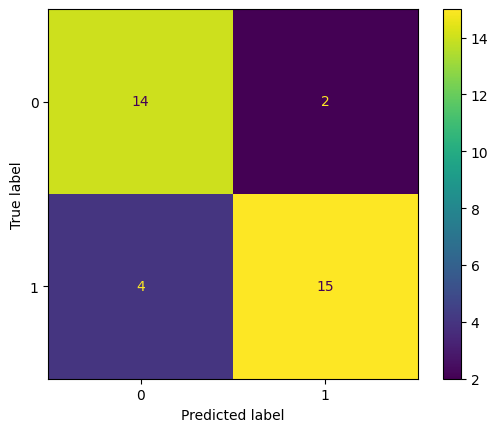

In [ ]:
# XGBOOST with parameter tuning
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
    X_main, y_main, test_size=0.4,random_state=42
)
XGB_model = XGBClassifier(n_estimators=100, learning_rate=0.08, n_jobs=4)
XGB_model.fit(X_training, y_training, 
             early_stopping_rounds=5, 
             eval_set=[(X_testing, y_testing)],
             verbose=False)

predictions = XGB_model.predict(X_testing)
# print(predictions)
# print(y_testing)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_testing, predictions)

print(acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_testing, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Cross validating to make sure model doesn't overfit

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(XGBClassifier(n_estimators=100, learning_rate=0.08, n_jobs=4))
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())



Cross-validation accuracy: 0.701307


In [ ]:
# K fold classification
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# XGB_model_k = XGBClassifier(n_estimators=100, learning_rate=0.08, n_jobs=4)
XGB_model_k = XGBClassifier()
# XGB_model_k.fit(X_training, y_training)

# predictions = XGB_model_k.predict(X_testing)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
val_score = cross_val_score(XGB_model_k, X=X, y=y, cv=cv)

print(val_score)

[0.88888889 0.83333333 0.82352941 1.         0.76470588]
